In [2]:
import numpy as np
import matplotlib.pyplot as plt

# experiemnt 1
- N mesuraments per cycle = 20
- N cycles = 10 (so 200 measuraments in tot)
- delay between consecutive measuraments 5ms

In [3]:
def time_correlation(vector):
    mean = np.mean(vector)
    var = np.var(vector)
    corr = 1
    for i,i_1 in zip(vector[0:-1], vector[1:]):
        #print(i,i_1, (i-mean)*(i_1-mean))
        corr = corr + (i-mean)*(i_1-mean)/var
    return corr/len(vector)

def plot_occurrences(occurrences):
    mu = np.mean(occurrences)
    std = np.std(occurrences)
    x = np.arange(int(min(occurrences)), int(max(occurrences)))

    print("mean = ", mu, "+-", std)
    print("Q = ", std**2/mu-1)
    print("time correlation = ", time_correlation(np.array(occurrences)))

    plt.hist(occurrences, bins=x, label="measured")
    plt.xlabel("Nions")
    plt.ylabel("occurrences")
    #plt.xlim([0,40])

    plt.show()
    
def get_Q(vector):
    return np.var(vector)/np.mean(vector) - 1

def Q_meaneds(vector, N_samples):
    Q_meaneds = []
    N_per_sample = int(len(vector)/N_samples)
    for i in range(N_samples):
        Q_meaneds.append(get_Q(vector[i*N_per_sample:(i+1)*N_per_sample]))
    return Q_meaneds

def means(vector, N_samples):
    means_ = []
    N_per_sample = int(len(vector)/N_samples)
    for i in range(N_samples):
        means_.append(np.mean(vector[i*N_per_sample:(i+1)*N_per_sample]))
    return means_

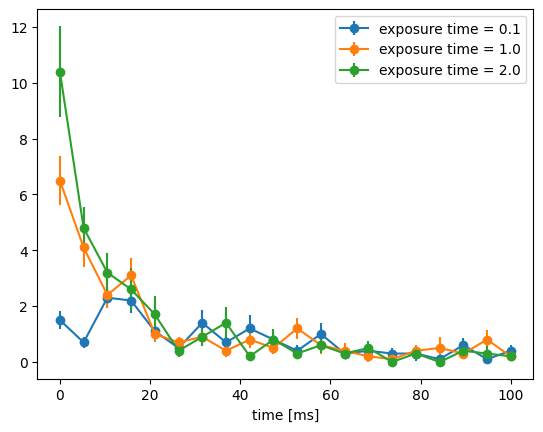

In [4]:
names = ["1_20_10_0,1", "1_20_10_1", "1_20_10_2"]
time = {"1_20_10_0,1": 0.1, "1_20_10_1": 1, "1_20_10_2": 2}
consecutive_experient_measurements = 20
delay_cons_exp = 5 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

for name in names:
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%20,i//20] = (float(terms[2]))

    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.1f"%time[name])
    plt.xlabel("time [ms]")
plt.legend()
plt.show()

In [5]:
sum(np.mean(occurrences, axis=1))

29.299999999999997

# experiement 2:
we just increase the density of the MOT.

87.80000000000001
153.70000000000002
128.7


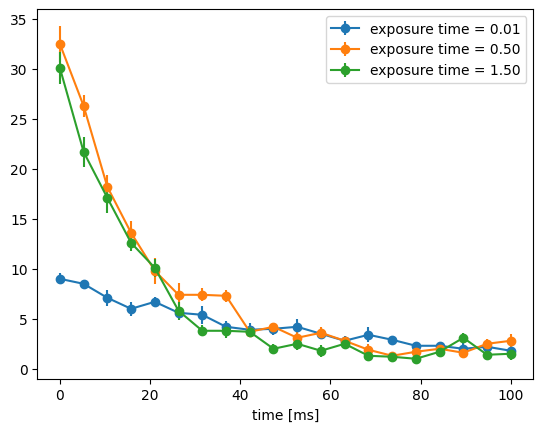

In [6]:
names = ["2_20_10_0,01", "2_20_10_0,5", "2_20_10_1,5"]
time = {"2_20_10_0,01": 0.01, "2_20_10_0,5": 0.5, "2_20_10_1,5": 1.5}
consecutive_experient_measurements = 20
delay_cons_exp = 5 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

for name in names:
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%20,i//20] = (float(terms[2]))

    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.2f"%time[name])
    plt.xlabel("time [ms]")
    print(sum(np.mean(occurrences, axis=1)))
plt.legend()
plt.show()

# experiment 3
n atoms vs dipole trap power

- delay photoionization-ON fields-ON : 0.7 mus
- photoionization pulse = 1 mus
- delay MOT off photoionization ON = 100 ms
- MOT cycle = 5 sec
- MOT off 1 sec
- N consicutive measuraments = 50
- single measure duration = 1 ms
- N cycles 10 (500 measures in tot)
- MOT: N = 50000 atoms, d = 2.5 10^9 cm^-3, r = 107 mus.

From this data we can extrapolate lots informations
- photoionization probability
- number of atoms in the dipole trap for dfferent powers

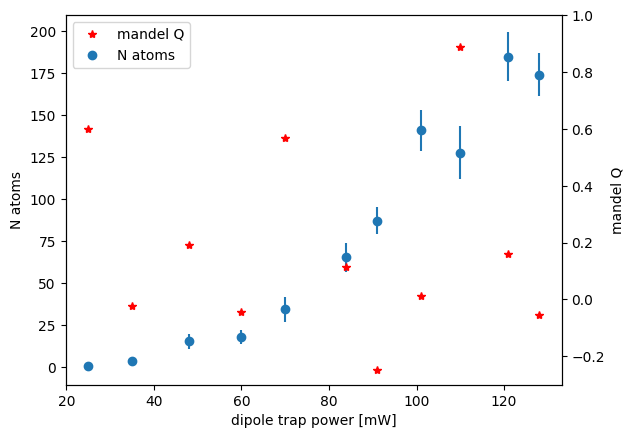

In [7]:
names = ["25", "35", "48", "60", "70", "84", "91", "101", "110", "121", "128"]
#names = ["25", "35", "48", "60", "70", "84", "91", "101", "110", "121", "128"]
#names = ["110"]
#time = {zip(names, np.)}#{"25": 0.1, "35": 1, "48": 2, "60":60, "70":70, "84":84, "91":, "101", "110", "121", "127", "128"}
consecutive_measurements = 50
cem_ = consecutive_measurements
delay_cons_exp = 1 # [ms]
N_cycles = 10
N_atoms_means = np.zeros(len(names))
N_atoms_std = np.zeros(len(names))
N_atoms_all = np.zeros([len(names), N_cycles])
powers = np.zeros(len(names))

data_all = np.zeros([consecutive_measurements, N_cycles, len(powers)])

for j, name in enumerate(names):
    occurrences = np.zeros([consecutive_measurements, N_cycles])
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-power_"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%cem_,i//cem_] = (float(terms[2]))
    
    data_all[:,:,j] = occurrences
    
    N_atoms_all[j,:] = np.sum(occurrences, axis=0)
    #print( sum(np.mean(occurrences, axis=1)))
    N_atoms_means[j] = sum(np.mean(occurrences, axis=1))
    #print(np.sum(occurrences, axis=0))
    N_atoms_std[j] = np.std(np.sum(occurrences, axis=0))
    powers[j] = int(name)
    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    #x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)
    #plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="power = "+name)
    #plt.xlabel("time [ms]")
#powers[10] = 120
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

Q_s = [get_Q(N_atoms_all[k,:]) for k in range(len(powers))]
ax2.plot(powers, Q_s , c = "r", marker = "*", ls = "", label = "mandel Q")
ax2.plot([],[],marker="o", linestyle="", label="N atoms")
#ax1.errorbar(powers, N_atoms_means, N_atoms_std, marker="o", linestyle="", label = "N atoms")
ax1.errorbar(powers, np.mean(N_atoms_all, axis=1), np.std(N_atoms_all, axis=1), marker="o", linestyle="", label = "N atoms")
#ax2.plot(powers, (N_atoms_std)**2/N_atoms_means -1 , c = "r", marker = "o", ls = "")

#plt.yscale("log")
plt.legend()
ax2.set_ylim([-0.3,1])
ax2.set_ylabel("mandel Q")
ax1.set_xlabel("dipole trap power [mW]")
ax1.set_ylabel("N atoms")
plt.show()

In [8]:
from scipy.optimize import minimize

def MLE_exp_rate(vector, delta_t):
    mean_k = 0
    for i, value in enumerate(vector):
        mean_k += i*value
    rate = 1/delta_t * np.log(sum(vector)/mean_k+1)
    return rate

def exponential(rate, t):
    return rate*np.e**(-rate*t)

def min_squared_rates(vector_means, stderr, delta_t, p0=[0,0]):

    def squared_sum(x):
        N_0 = x[0]
        rate = x[1]
        summ_ = 0
        for i in range(len(vector_means)):
            summ_ += (vector_means[i] - N_0*exponential(rate, i*delta_t))**2 / stderr[i]**2
        return summ_

    result = minimize(squared_sum, x0=p0)
    #print(result)
    return result.x

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_19163/706132396.py:7: RuntimeWarning: invalid value encountered in double_scalars
  rate = 1/delta_t * np.log(sum(vector)/mean_k+1)
/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_19163/706132396.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  summ_ += (vector_means[i] - N_0*exponential(rate, i*delta_t))**2 / stderr[i]**2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


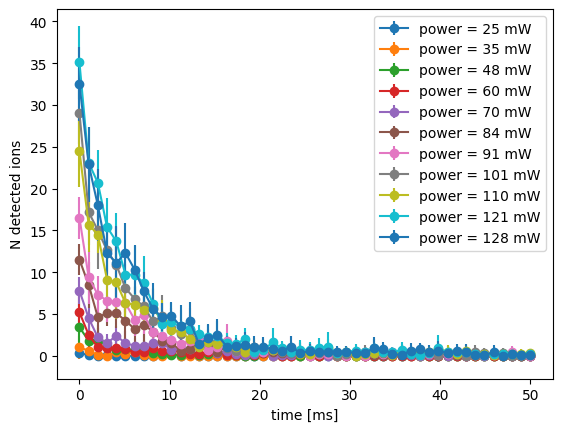

In [9]:
rates_MLE = []
drates_MLE = []

rates_ms = []
drates_ms = []

x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)
for power in range(len(powers)):#[2,6,10]:
    rates = []
    for rep in range(N_cycles):
        rates.append(MLE_exp_rate(data_all[:, rep, power], delay_cons_exp))
    rates_MLE.append(np.mean(rates))
    drates_MLE.append(np.std(rates))
    
    result = min_squared_rates(np.mean(data_all[:, :, power], axis=1), np.std(data_all[:, :, power], axis=1), delay_cons_exp, p0=[N_atoms_means[power],rates_MLE[-1]])
    rates_ms.append(result[1])

    y = result[0]*exponential(result[1], x)
    #plt.plot(x,y)
    #plt.plot(x, data_all[:,8,power], marker="o", linestyle="-", label="power = "+names[power]+" mW")
    plt.errorbar(x, np.mean(data_all[:,:,power], axis=1), np.std(data_all[:,:,power], axis=1), marker="o", linestyle="-", label="power = "+names[power]+" mW")
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("N detected ions")
#plt.yscale("log")
plt.show()

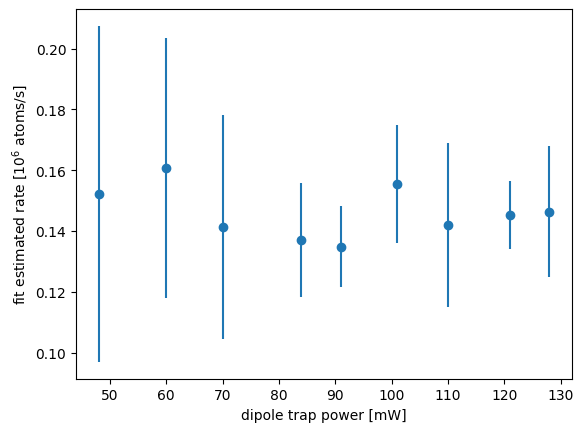

In [16]:
plt.errorbar(powers[2:], rates_MLE[2:], drates_MLE[2:], marker="o", ls="")
#plt.plot(powers[2:], rates_ms[2:], marker="o", ls="")
plt.xlabel("dipole trap power [mW]")
plt.ylabel(r"fit estimated rate [$10^6$ atoms/s]")
plt.show()


# Experiment 4

185.53608641193358
244.17803528948502
181.00399246842233
215.91119955920914
125.7386853531351


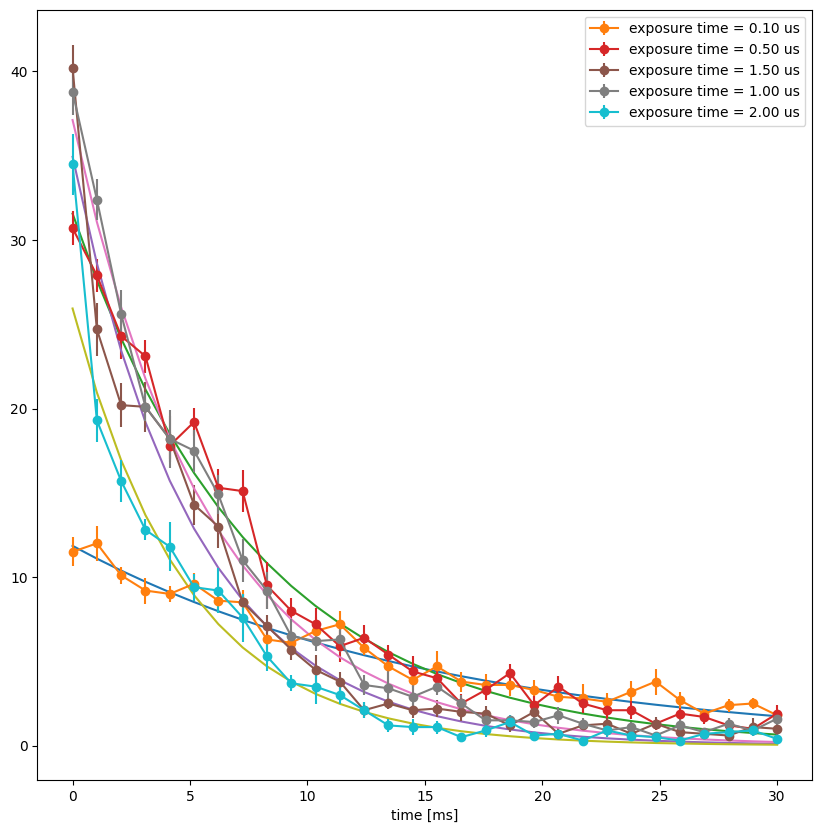

In [11]:
#names = ["3_30_10_0,1", "3_30_10_0,01", "3_30_10_0,5", "3_30_10_1,5", "3_30_10_1", "3_30_10_2"]
time = {"3_30_10_0,1": 0.1, "3_30_10_0,5": 0.5, "3_30_10_1,5": 1.5, "3_30_10_1": 1, "3_30_10_2": 2}
times = list(time.values())
consecutive_experient_measurements = 30
cem_ = consecutive_experient_measurements
delay_cons_exp = 1 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

N_tots = []
N_tots_ms = []

rates_all = []
drates_all = []

rates_ms = []

plt.figure(figsize=(10,10))
for name in time.keys():
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%cem_,i//cem_] = (float(terms[2]))

    rates = []
    for rep in range(N_cycles):
        rates.append(MLE_exp_rate(occurrences[:,rep], time[name]))# time[name]))
    rate = np.mean(rates)
    rates_all.append(rate)
    drate = np.std(rates)
    drates_all.append(drate)
    N_tot = sum(np.mean(occurrences, axis=1))

    result = min_squared_rates(np.mean(occurrences, axis=1), np.std(occurrences, axis=1), delay_cons_exp, p0=[N_atoms_means[power],rates_MLE[-1]])
    rates_ms.append(result[1])
    print(result[0])
    N_tots_ms.append(result[0])
    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    y = result[0]*exponential(result[1], x)
    #y = N_tot*rate*np.exp(-x*rate)
    plt.plot(x,y)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.2f"%time[name]+" us")
    plt.xlabel("time [ms]")
    N_tots.append(N_tot)
plt.legend()
#plt.yscale("log")
plt.show()

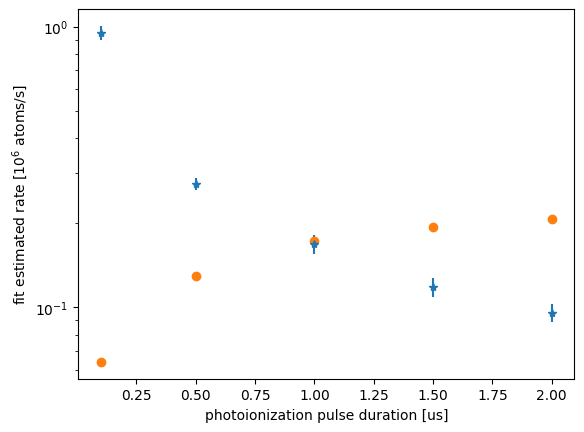

In [12]:
plt.errorbar(time.values(), rates_all, drates_all, marker="*", ls="")
plt.plot(time.values(), rates_ms, marker="o", ls="")
plt.xlabel("photoionization pulse duration [us]")
plt.ylabel(r"fit estimated rate [$10^6$ atoms/s]")
plt.yscale("log")
plt.show()

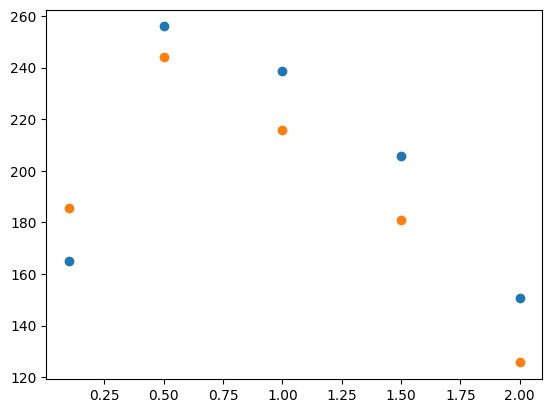

In [13]:
plt.plot(time.values(), N_tots, "o")
plt.plot(time.values(), N_tots_ms, "o")
plt.show()

In [14]:
Q_m = 0
for k in range(len(names)):
    Q_m += get_Q(N_atoms_all[k,:])
Q_m/len(names)

0.19628158540512325

In [15]:
get_Q(N_atoms_all[6,:])

-0.248105625717566